# Before Running the Script Please Make Sure you Select the Run Time as GPU

#**Import the Required Libraries**

In [ ]:
from IPython.display import Image

#**Clone the Github Repo**

In [ ]:
!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git

Cloning into 'YOLOv8-DeepSORT-Object-Tracking'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 403 (delta 135), reused 239 (delta 104), pack-reused 102
Receiving objects: 100% (403/403), 78.08 MiB | 10.14 MiB/s, done.
Resolving deltas: 100% (153/153), done.


In [ ]:
!pwd

/content


##Setting the Current Directory

In [ ]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking

/content/YOLOv8-DeepSORT-Object-Tracking


##Install all the Dependencies

In [ ]:
!pip install -e '.[dev]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Moving to the Required Directory

In [ ]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


##Importing the Dataset from the RoboFlow

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/roboflow-annotate.gif)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="70SpXc1OmTXzM9mxngGh")
project = rf.workspace("drone-dataset-mvh8i").project("detection-bzujh")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 KB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 19.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=ce2ef8c7204c0bf4695ff7141af9a1b416a17b1984d163971a5e675c4cd9e4fc
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to detection-1 in yolov5pytorch:: 100%|██████████| 9374/9374 [00:02<00:00, 4166.02it/s]


##To implement the DeepSORT tracking, downloading the required files 

In [ ]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:01<00:00, 23.8MB/s]


##Unzipping the DeepSORT Files

In [ ]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

#**Training the Custom Model**

In [ ]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'

In [ ]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
%cd {dataset.location}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/detection-1


In [ ]:
%cd {HOME} 

# defalt epoch is 50 per epoch is 16 min, test only 1 or 2

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=2 imgsz=640

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect
100% 83.7M/83.7M [00:10<00:00, 8.60MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/detection-1/data.yaml, epochs=2, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, i

#**Checking the Files inside the Train Folder**

In [ ]:
!ls /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1674663267.726a0f1ce461.1463.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
predictions.json				    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights


#**Printing the Confusion Matrix**

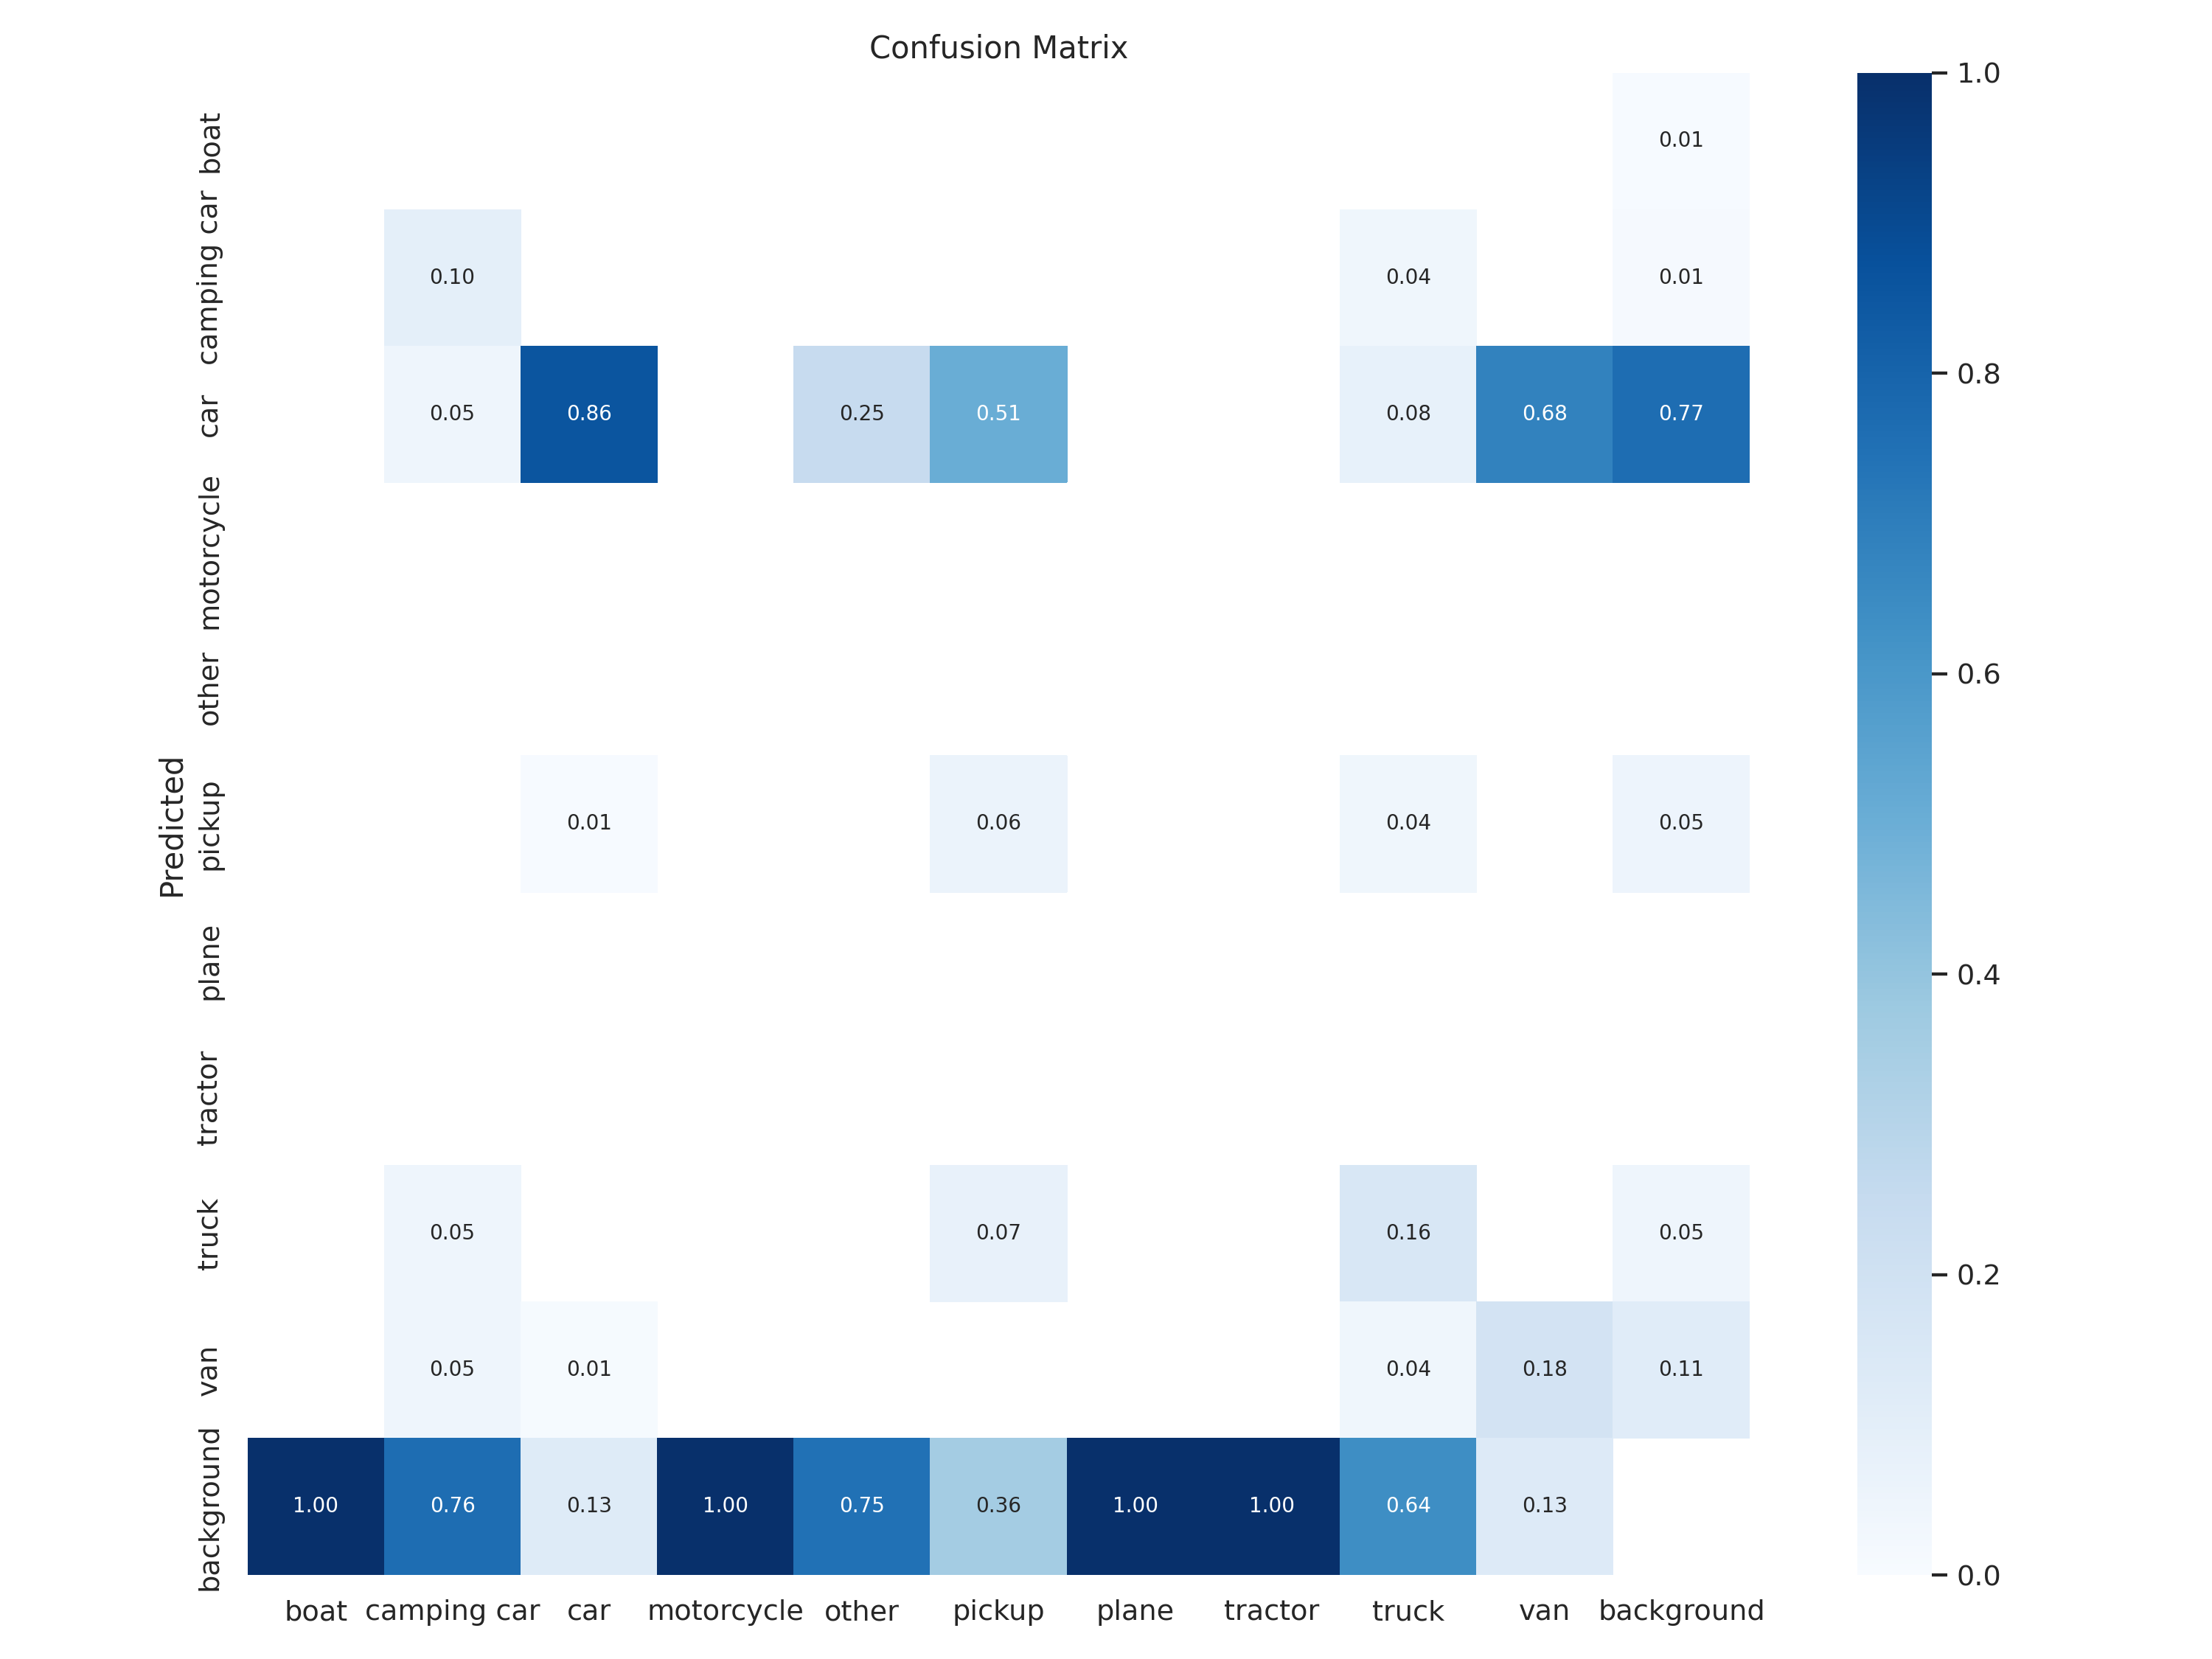

In [ ]:
Image(filename = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/confusion_matrix.png')

#**Printing the Training and the Validation Loss**

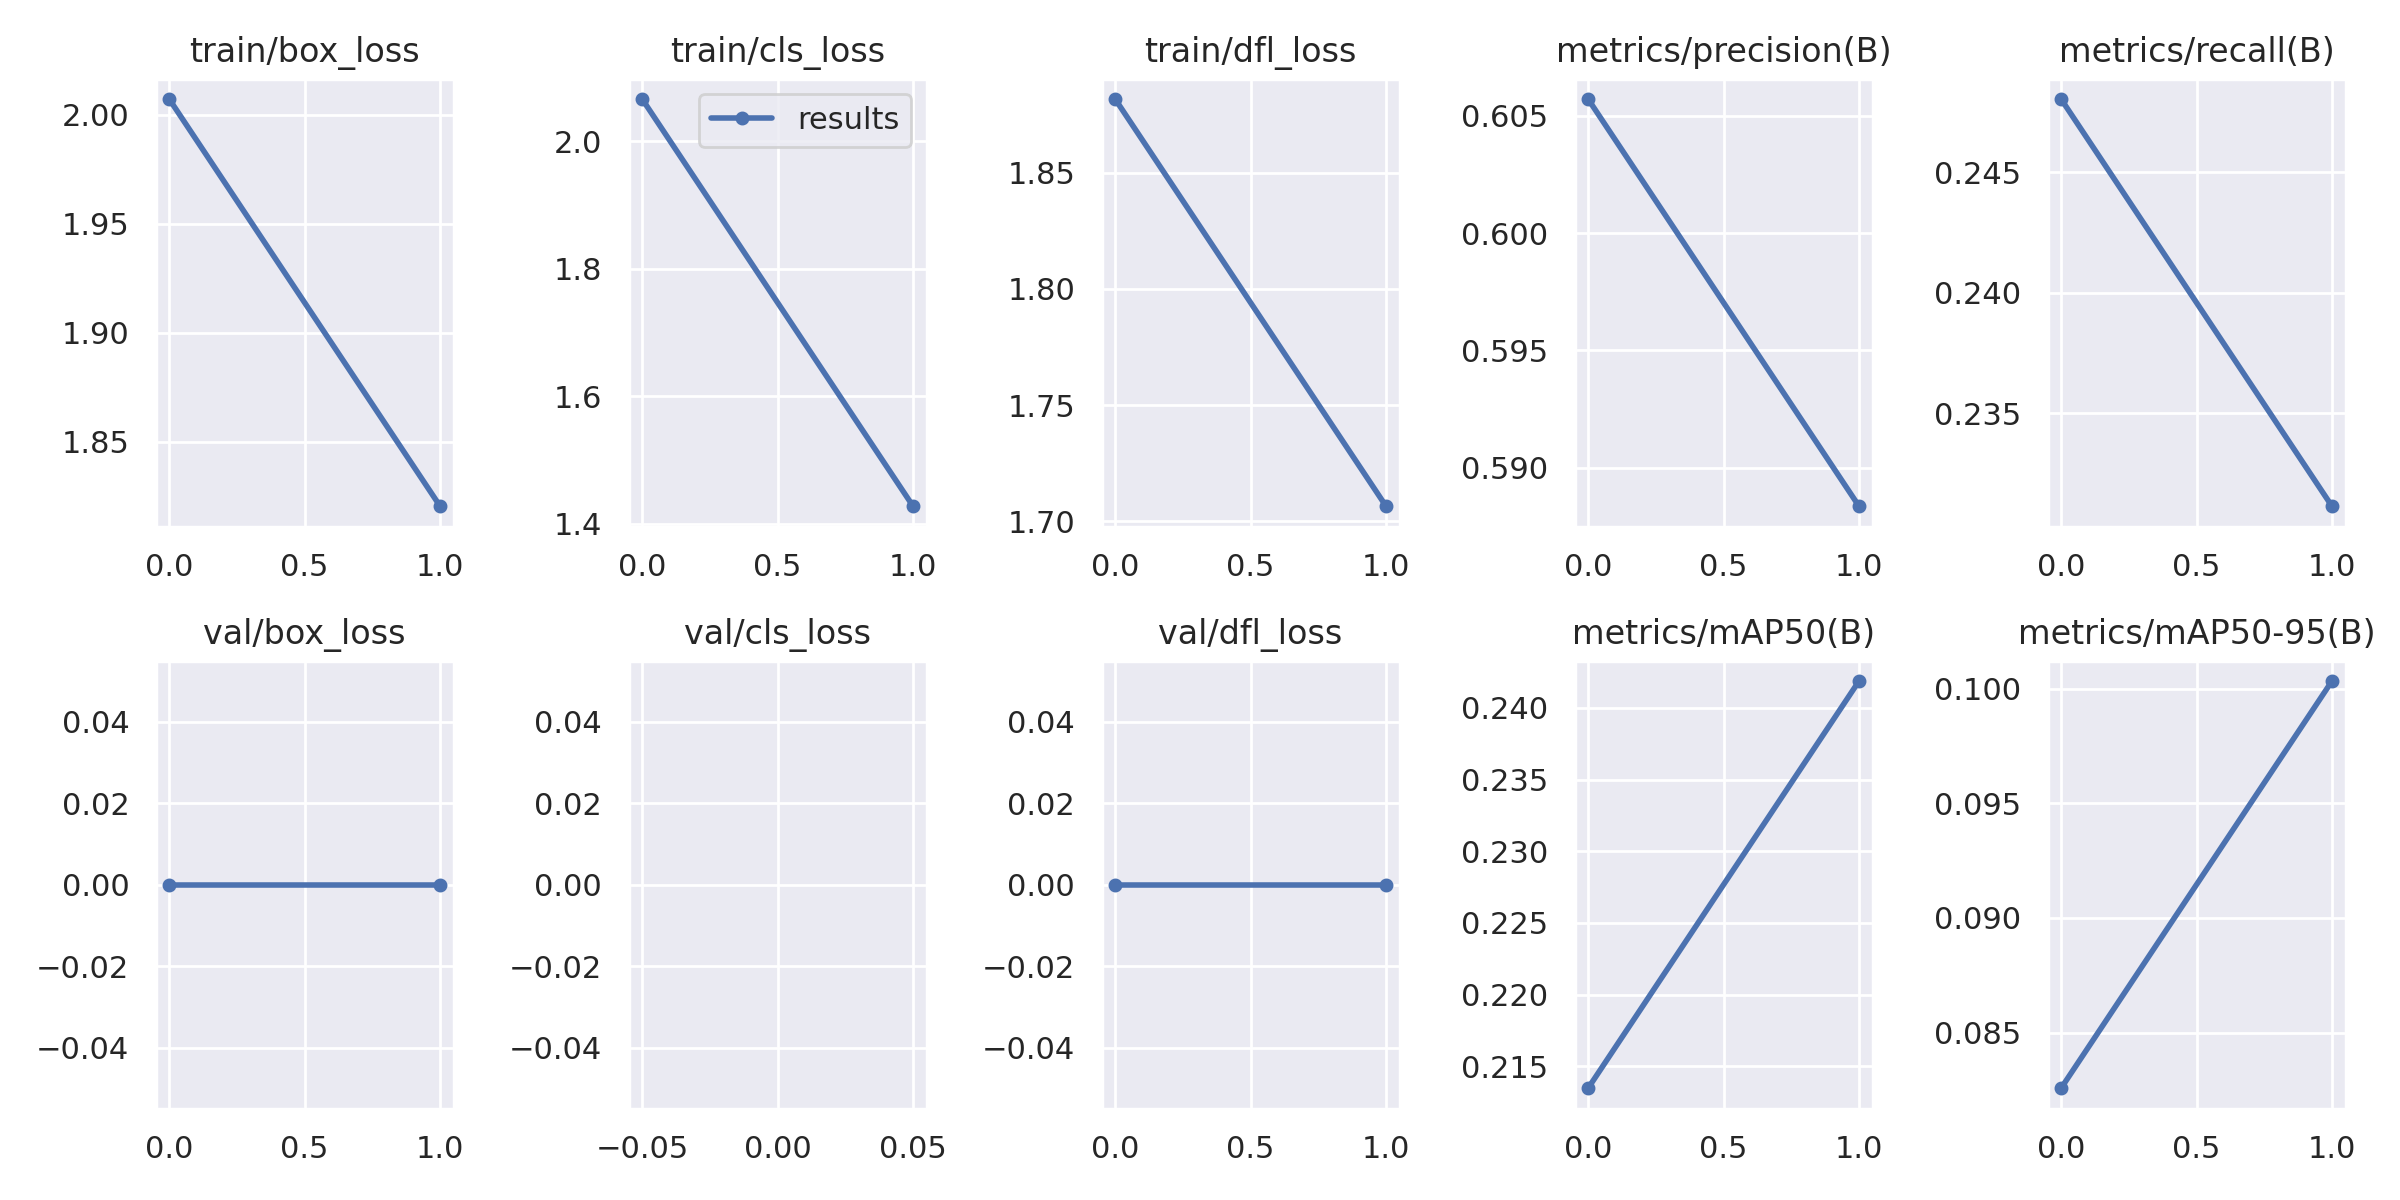

In [ ]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/results.png', width = 600)

#**Printing the Model Prediction on Validation Batch**

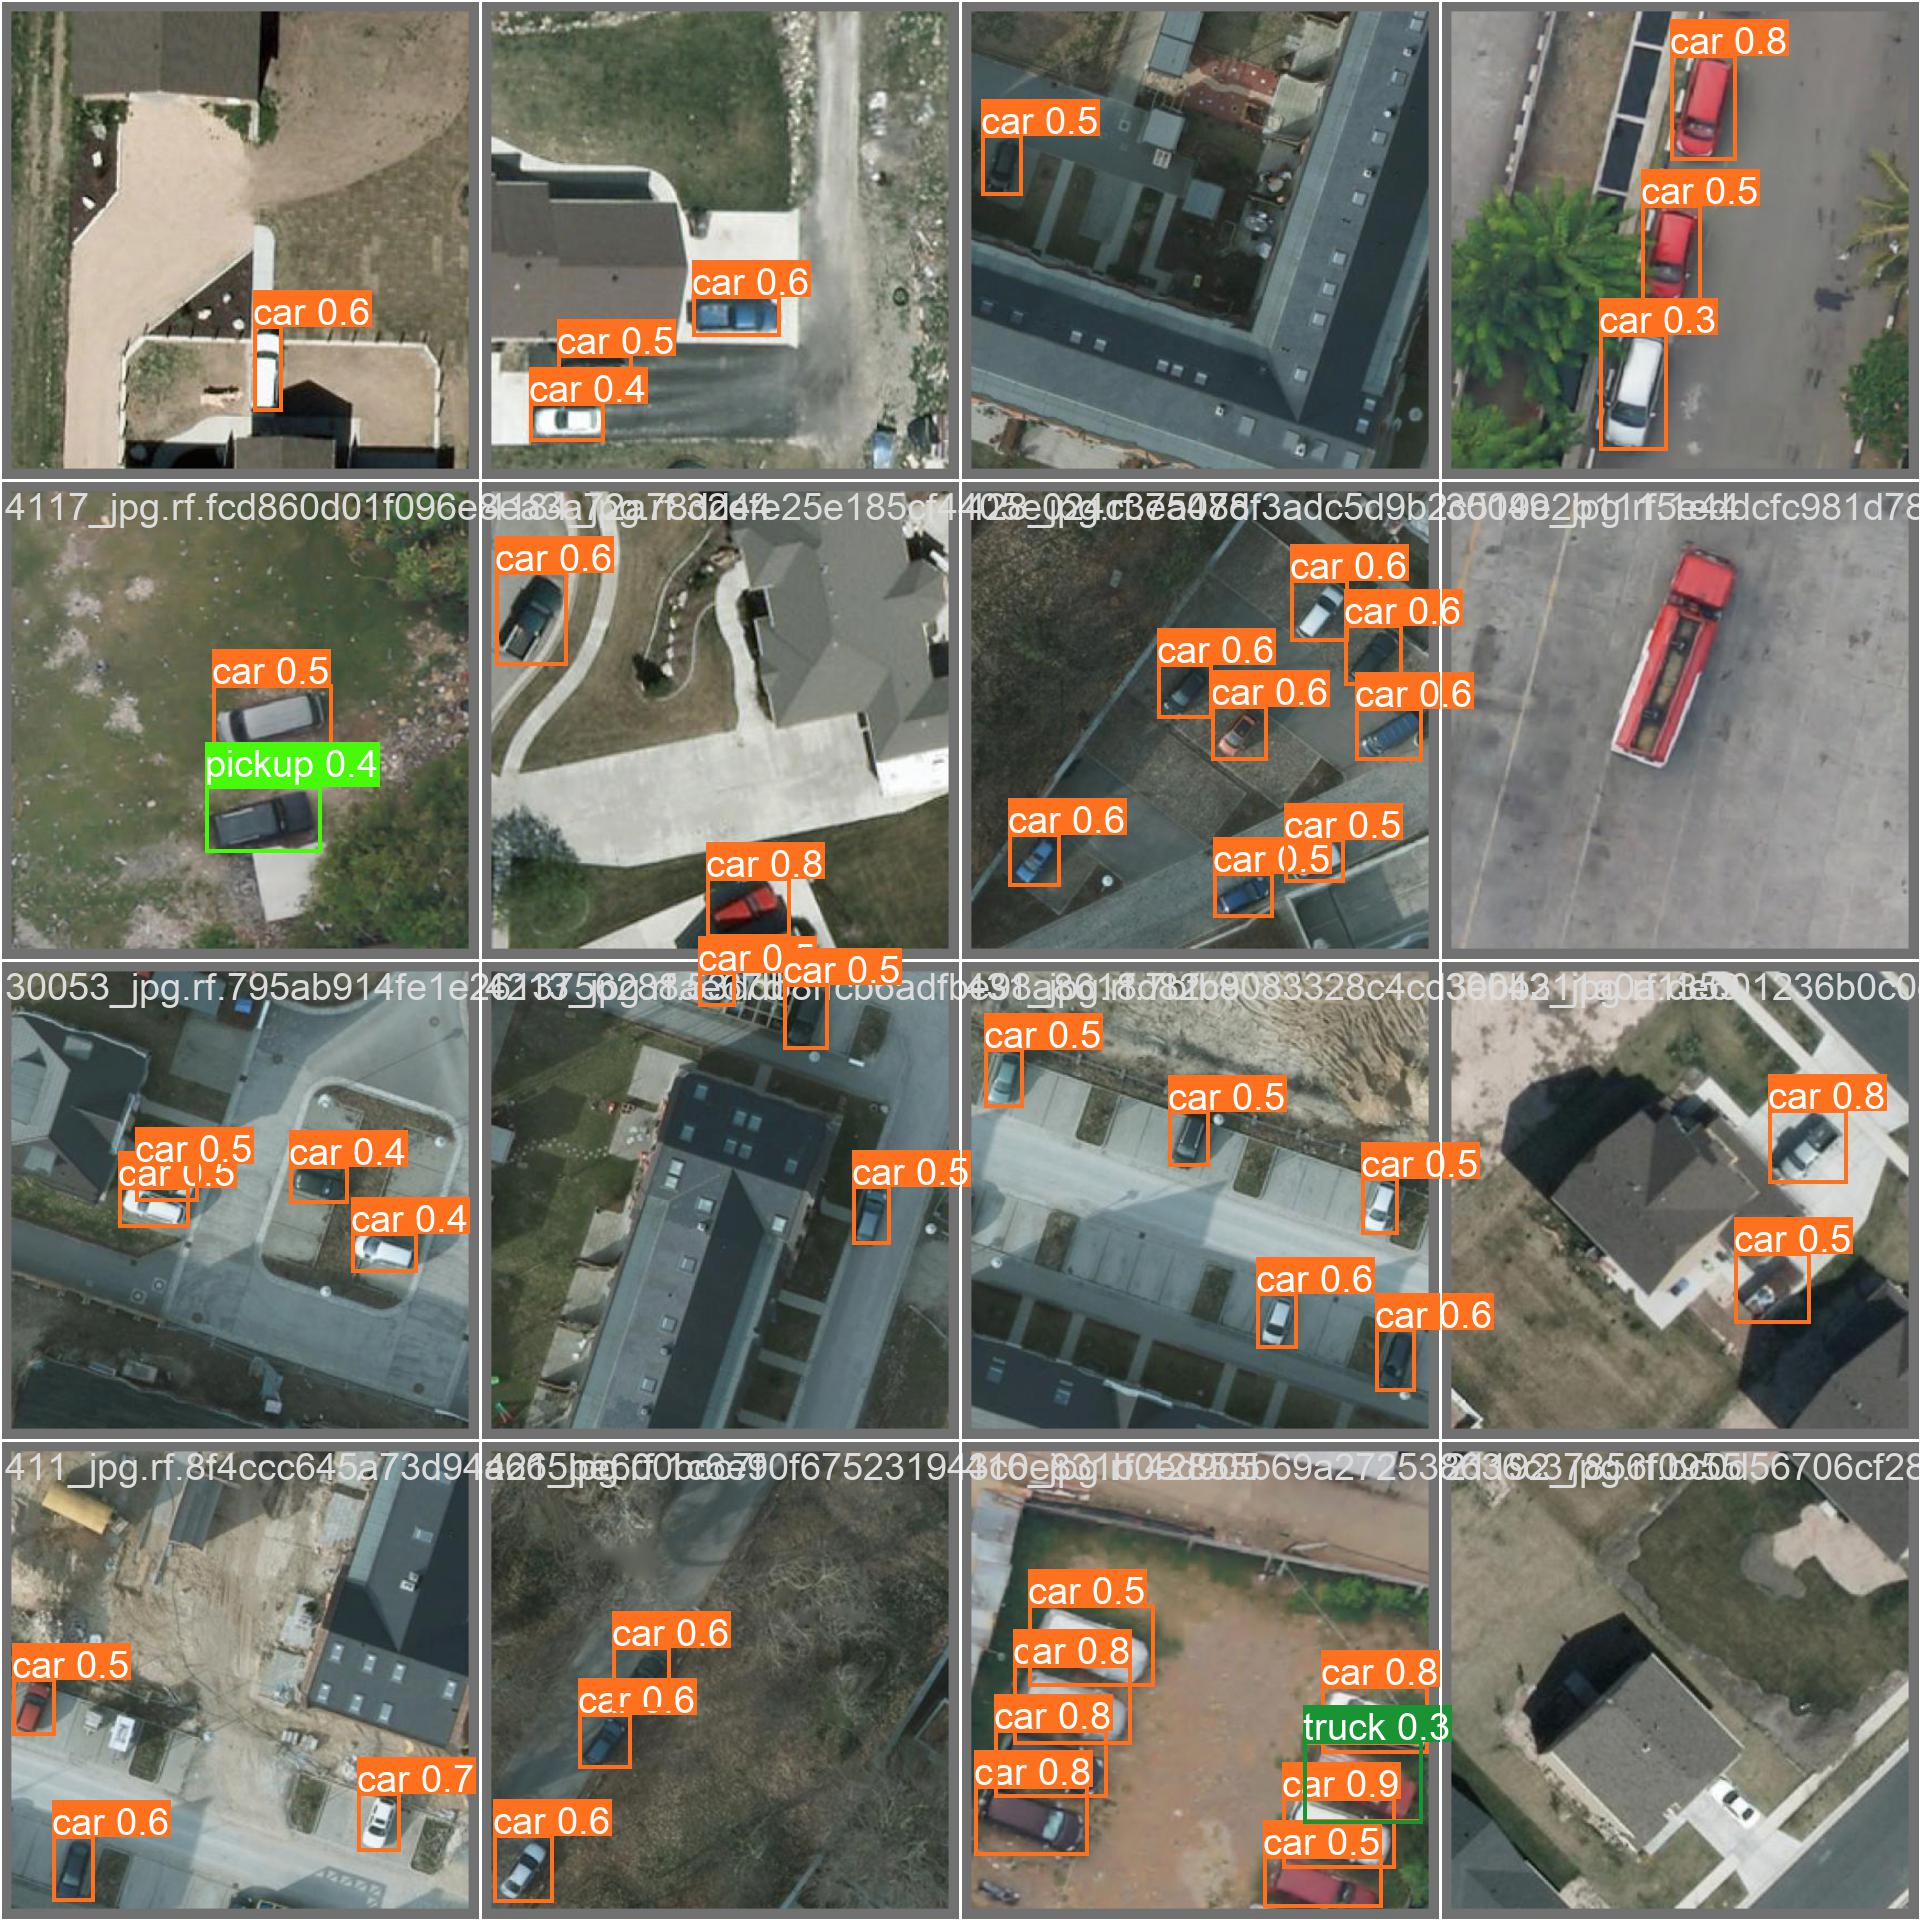

In [ ]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/val_batch2_pred.jpg', width =600)

#**Downloading the Weights From the Google Drive**"


In [ ]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
!gdown "https://drive.google.com/uc?id=1VBAZtJ5uJMEsnyya_d0yMP6efBRQ8IX-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1VBAZtJ5uJMEsnyya_d0yMP6efBRQ8IX-&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/best.pt
100% 87.7M/87.7M [00:01<00:00, 54.4MB/s]


#**Validate Custom Model**

In [ ]:
!pwd

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [ ]:
!python val.py model='best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.3 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/detection-1/valid/labels.cache... 619 images, 1 backgrounds, 0 corrupt: 100% 619/619 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 39/39 [00:27<00:00,  1.44it/s]
                   all        619       2185      0.757      0.687      0.764      0.429
                  boat        619          1      0.472          1      0.995      0.796
           camping car        619         21      0.866      0.667      0.735      0.379
                   car        619       1963      0.882      0.918      0.911      0.422
            motorcycle        619         59      0.859      0.678      0.844      0.326
                 other        619          4       0.32       0.25 

#**Inference with Custom Model**

#**Demo Video 1**

In [ ]:
!gdown "https://drive.google.com/uc?id=1UUZUS76ylH5RjMSc9s4rITSYDTG5AHt0&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1UUZUS76ylH5RjMSc9s4rITSYDTG5AHt0&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test4.mp4
100% 7.96M/7.96M [00:00<00:00, 177MB/s]


In [ ]:
!python predict.py model='best.pt' source='test4.mp4'

[2023-01-25 16:24:21,192][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
Ultralytics YOLOv8.0.3 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs
video 1/1 (1/808) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test4.mp4: 384x640 11 cars, 41.7ms
video 1/1 (2/808) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test4.mp4: 384x640 11 cars, 40.7ms
video 1/1 (3/808) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test4.mp4: 384x640 11 cars, 39.7ms
video 1/1 (4/808) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test4.mp4: 384x640 11 cars, 35.9ms
video 1/1 (5/808) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test4.mp4: 384x640 11 cars, 36.0ms
video 1/1 (6/808) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/t

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train3/test4.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

#**Demo Video 2**

In [ ]:
!gdown "https://drive.google.com/uc?id=1MaH6dNoegFjwkhtedxXufn2UD7EPpF_w&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1MaH6dNoegFjwkhtedxXufn2UD7EPpF_w&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test2.mp4
100% 3.79M/3.79M [00:00<00:00, 269MB/s]


In [ ]:
!python predict.py model='best.pt' source='test2.mp4'

[2023-01-25 16:31:38,209][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
Ultralytics YOLOv8.0.3 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs
video 1/1 (1/319) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test2.mp4: 384x640 20 cars, 40.8ms
video 1/1 (2/319) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test2.mp4: 384x640 20 cars, 39.9ms
video 1/1 (3/319) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test2.mp4: 384x640 18 cars, 39.8ms
video 1/1 (4/319) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test2.mp4: 384x640 19 cars, 39.8ms
video 1/1 (5/319) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/test2.mp4: 384x640 19 cars, 25.3ms
video 1/1 (6/319) /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/t

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train4/test2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.